# Multiple Linear Regression

In [1]:
import pandas as pd
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [6]:
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
x=df.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [16]:
y=df['charges']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
c=lr.intercept_
c

-10936.55643749616

In [21]:
m=lr.coef_
m

array([  252.15440619,  -281.16765835,   316.514758  ,   351.46251009,
       24044.37169738,  -318.49464584])

In [22]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([ 9.43065633e+03,  2.11065428e+03,  3.38515301e+03,  1.10016177e+04,
        1.36037651e+04,  8.44727609e+03,  2.88990637e+04,  3.72146164e+04,
        3.68875358e+03,  6.27798404e+02,  1.41223081e+04,  2.73361405e+04,
        1.14907930e+04,  1.41577934e+04,  5.73682779e+03,  1.84667277e+02,
        1.08016639e+04,  2.66562122e+03,  8.35164936e+03,  1.21644213e+04,
        4.73033543e+03,  6.28230468e+03,  6.97413445e+03,  2.52432045e+04,
       -1.11528211e+03,  1.37952095e+03,  1.47516504e+04,  2.78638188e+04,
        3.01066649e+04,  4.38138693e+03,  5.04988785e+03,  1.03407691e+04,
        1.04514304e+04,  1.09698469e+04,  1.58049639e+04,  7.25216168e+03,
        1.70293490e+04,  9.83540671e+03,  1.21394763e+04,  5.47820491e+03,
        7.32559696e+03,  4.57536386e+03,  5.68145006e+03,  1.14449963e+04,
        3.38903134e+04,  4.71158063e+03,  1.04994379e+04,  8.19271074e+03,
        3.47308637e+04,  3.23561854e+04,  4.84084061e+03,  2.88797125e+03,
        1.16892254e+04,  

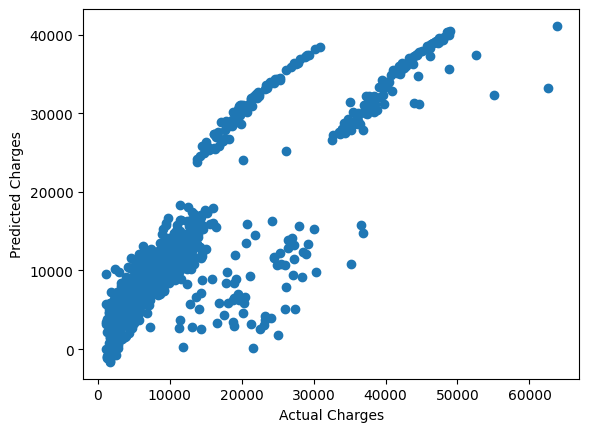

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


In [28]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.7544083642384214

In [29]:
y_pred_test=lr.predict(x_test)

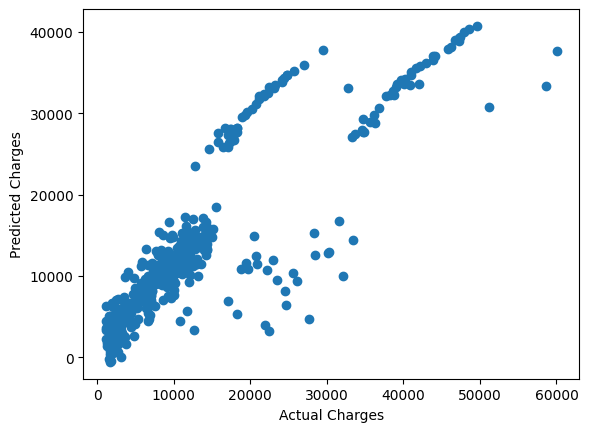

In [30]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [31]:
r2_score(y_test,y_pred_test)

0.740367716897532